# 📊 Comprehensive Exploratory Data Analysis (EDA) with Python
### Author: [Ali Hamza](https://github.com/officialalihamza) | [Kaggle](https://www.kaggle.com/ruthlessali) | [LinkedIn](https://www.linkedin.com/in/alihamzaba/)

> "Know your data before you model your data."

This notebook is a **practical** guide for beginners & intermediates who want to master EDA in Python.  
We will use the famous **Titanic dataset** to illustrate the **four pillars** of EDA:
1. Data Composition  
2. Data Distribution  
3. Data Relationships  
4. Data Comparison  

**Libraries used**  
- Core: pandas, numpy  
- Viz: matplotlib, seaborn, plotly (animated)  
- Utils: scipy, warnings, missingno

In [1]:
# -------------------------
# 0. Setup & Global imports
# -------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from scipy import stats
import warnings, os
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', palette='colorblind')
pd.set_option('display.max_columns', None)

# Load dataset straight from seaborn
df = sns.load_dataset('titanic')
print('Shape:', df.shape)
df.head()

Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 🔍 1. Data Composition
Understand the *structure* of your dataset: types, missingness, duplicates, cardinality.

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


None

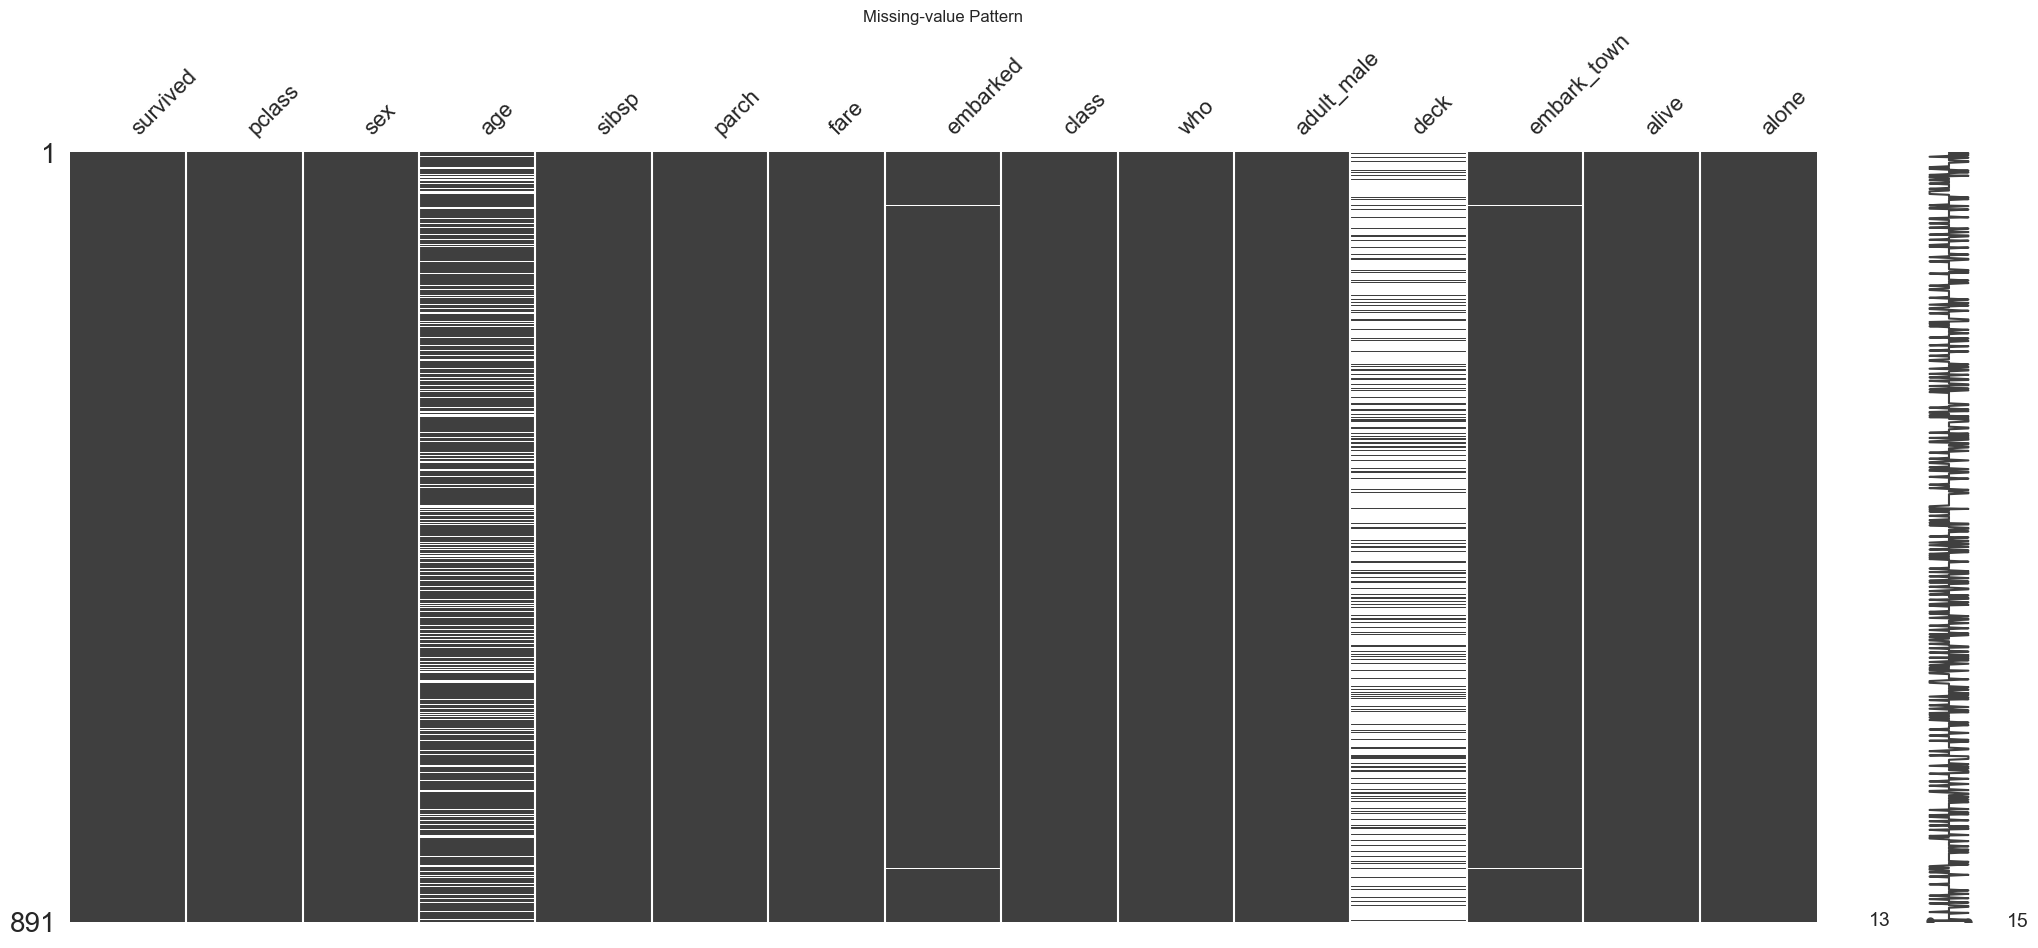

Duplicate rows: 107


In [2]:
# 1.1 High-level info
display(df.info())

# 1.2 Missing-value matrix (visual)
msno.matrix(df)
plt.title('Missing-value Pattern')
plt.show()

# 1.3 Duplicate rows
print('Duplicate rows:', df.duplicated().sum())

In [3]:
# 1.4 Cardinality & memory usage
card = pd.DataFrame({'dtype': df.dtypes,
                     'unique': df.nunique(),
                     'missing': df.isna().sum(),
                     'missing_pct': (df.isna().sum()/len(df)*100).round(2)})
card.sort_values('missing_pct', ascending=False)

,dtype,unique,missing,missing_pct
deck,category,7,688,77.22
age,float64,88,177,19.87
embarked,str,3,2,0.22
embark_town,str,3,2,0.22
sex,str,2,0,0.00
pclass,int64,3,0,0.00
survived,int64,2,0,0.00
fare,float64,248,0,0.00
parch,int64,7,0,0.00
sibsp,int64,7,0,0.00


👉 **Interpretation**: `age` & `embarked` have moderate missing values (~20 % & 0.2 %).  
`deck` is almost 80 % missing—likely a candidate for deletion or special imputation.  
No duplicate rows detected.

## 📈 2. Data Distribution
Examine how individual variables behave: centre, spread, skewness, outliers.

In [4]:
# 2.1 Numeric variables
num_cols = df.select_dtypes(include=np.number).columns
print('Numeric columns:', list(num_cols))

# Quick descriptive stats
df[num_cols].describe().T

Numeric columns: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


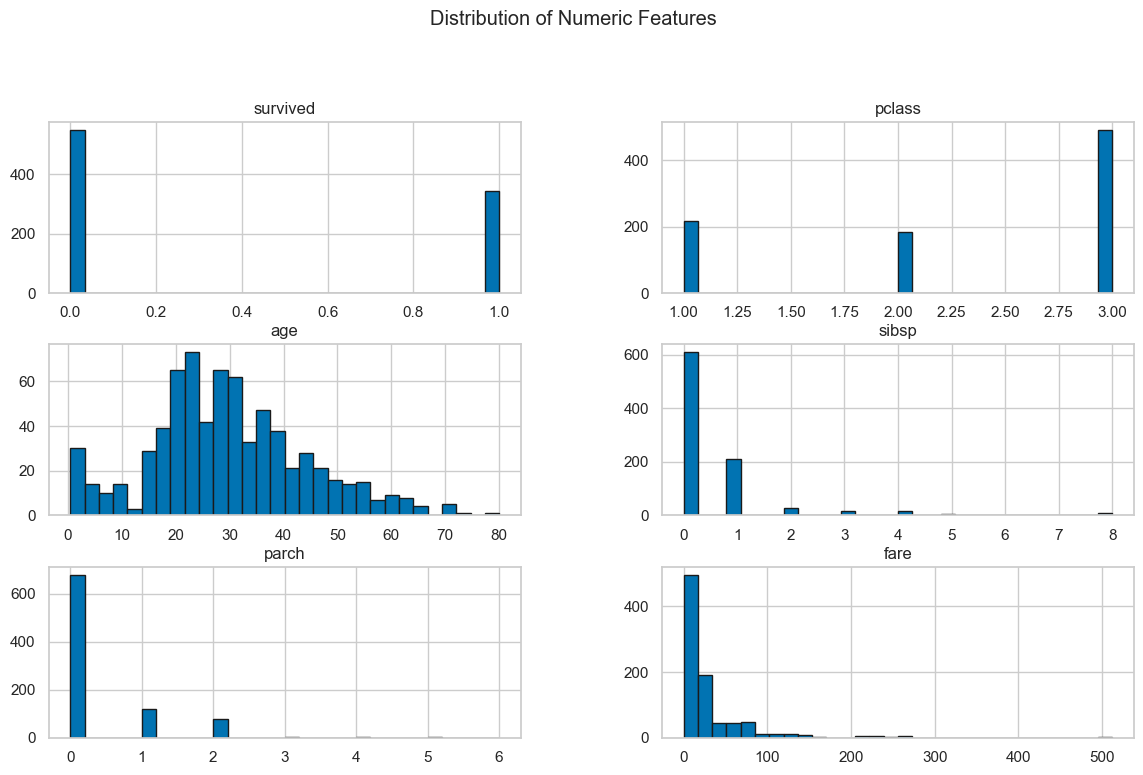

,skewness
fare,4.79
sibsp,3.70
parch,2.75
pclass,-0.63
survived,0.48
age,0.39


In [5]:
# 2.2 Histograms + KDE overlay
df[num_cols].hist(bins=30, figsize=(14, 8), edgecolor='k')
plt.suptitle('Distribution of Numeric Features', y=1.02)
plt.show()

# Skewness check
skew_df = pd.DataFrame({'skewness': df[num_cols].skew().round(2)}).sort_values('skewness', key=abs, ascending=False)
skew_df

In [6]:
# 2.3 Animated histogram: Age distribution w.r.t. survival
fig = px.histogram(df, x='age', color='survived', nbins=30,
                   title='Age Distribution by Survival (animated)',
                   animation_frame='pclass', range_x=[0, 80],
                   opacity=0.7, barmode='overlay')
fig.update_layout(height=500)
fig.show()

👉 **Interpretation**: Age is slightly right-skewed (skew ≈ 0.4).  
The animation reveals that 1st-class passengers had more children & older adults, and survival rates vary visibly across age bands.

## 🔗 3. Data Relationships
Discover how variables interact: correlation, association, feature interactions.

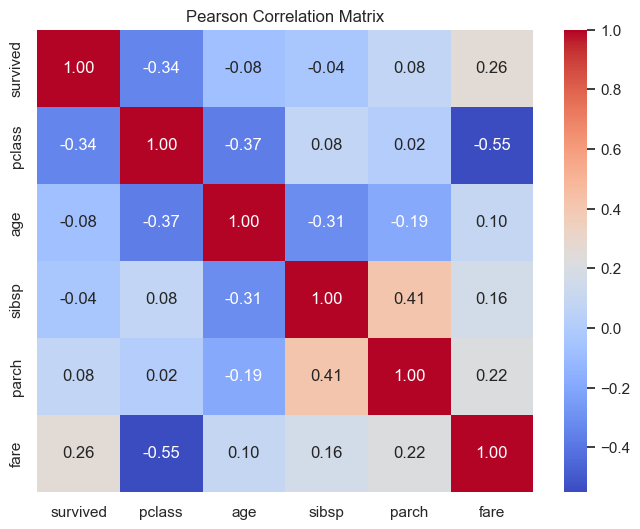

pclass    fare      0.549500
sibsp     parch     0.414838
age       pclass    0.369226
survived  pclass    0.338481
age       sibsp     0.308247
dtype: float64

In [7]:
# 3.1 Correlation heatmap (numeric)
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

# Strongest correlations
corr_df = df[num_cols].corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
corr_df[1:6]  # top-5 (excluding self-correlation)

Chi-square p-value: 1.20e-58


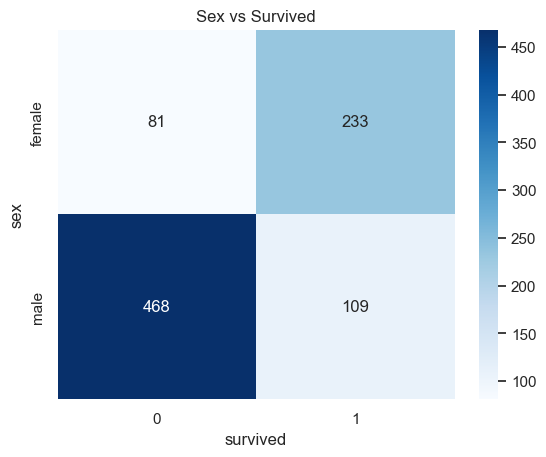

In [8]:
# 3.2 Categorical vs Categorical: Chi-square test
cont = pd.crosstab(df['sex'], df['survived'])
chi2, p, _, _ = stats.chi2_contingency(cont)
print(f'Chi-square p-value: {p:.2e}')
sns.heatmap(cont, annot=True, fmt='d', cmap='Blues')
plt.title('Sex vs Survived')
plt.show()

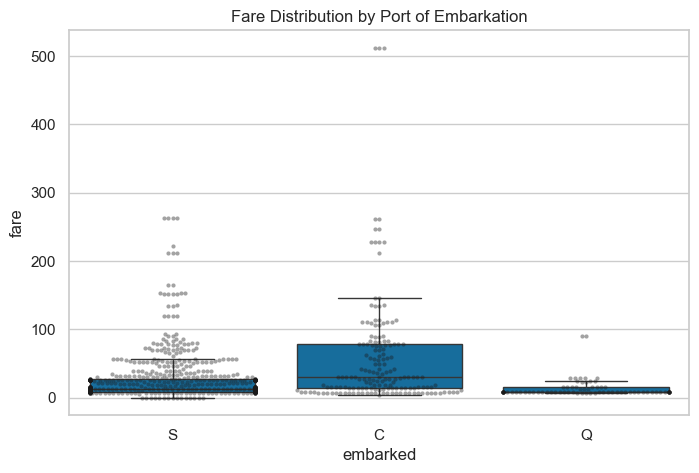

ANOVA p-value: 1.29e-16


In [9]:
# 3.3 Boxplot swarm combo: Fare vs Embarked
plt.figure(figsize=(8, 5))
sns.boxplot(x='embarked', y='fare', data=df, showfliers=False)
sns.swarmplot(x='embarked', y='fare', data=df, size=3, color='k', alpha=0.4)
plt.title('Fare Distribution by Port of Embarkation')
plt.show()

# ANOVA
groups = [group['fare'].values for name, group in df.dropna(subset=['embarked']).groupby('embarked')]
f_stat, p_anova = stats.f_oneway(*groups)
print(f'ANOVA p-value: {p_anova:.2e}')

👉 **Interpretation**:  
- `fare` & `pclass` are strongly correlated (-0.55), expected.  
- Sex & survival are **not independent** (p < 0.001).  
- ANOVA shows significant fare differences across embarked ports.

## ⚖️ 4. Data Comparison
Compare groups or time-periods to detect contrasts & drivers.

In [10]:
# 4.1 Survival rate across categorical slices
survival_summary = df.groupby(['sex', 'pclass'])['survived'].agg(['mean', 'count']).round(2)
survival_summary.columns = ['survival_rate', 'count']
survival_summary

survival_rate  count
sex    pclass                      
female 1                0.97     94
       2                0.92     76
       3                0.50    144
male   1                0.37    122
       2                0.16    108
       3                0.14    347

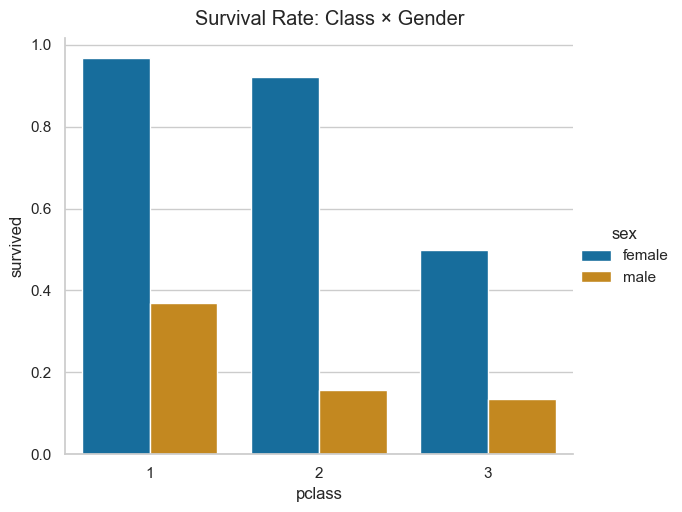

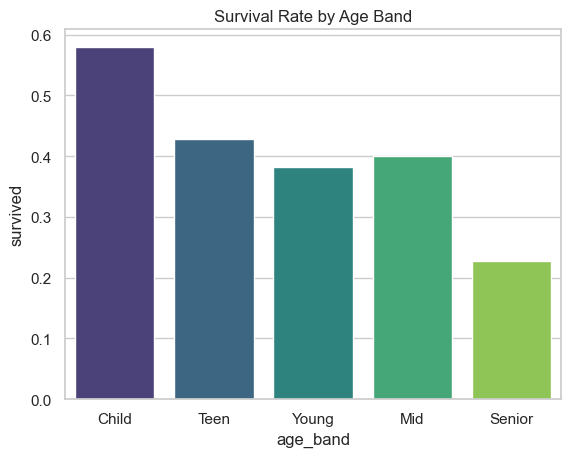

In [11]:
# 4.2 Faceted bar chart
g = sns.catplot(x='pclass', y='survived', hue='sex', data=df,
                kind='bar', height=5, aspect=1.2, ci=None)
g.fig.suptitle('Survival Rate: Class × Gender', y=1.02)
plt.show()

# 4.3 Age bands comparison
df['age_band'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young', 'Mid', 'Senior'])
sns.barplot(x='age_band', y='survived', data=df, ci=None, palette='viridis')
plt.title('Survival Rate by Age Band')
plt.show()

In [12]:
# 4.4 Animated bar-race style: survival rate evolution across age bands & classes
tmp = df.groupby(['age_band', 'pclass'])['survived'].mean().reset_index()
fig = px.bar(tmp, x='age_band', y='survived', color='pclass',
             title='Survival Rate: Age Band vs Passenger Class',
             range_y=[0, 1], text='survived', height=500,
             labels={'survived':'Survival Rate'})
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

👉 **Interpretation**:  
- **Gender dominates survival**: females > males across every class.  
- **Class matters**: 1st-class passengers had higher survival regardless of age.  
- **Children** (age < 12) enjoyed the highest survival rate, especially in 1st & 2nd class.

## ✅ Best-Practice Checklist (copy into your projects)
- [ ] Always start with `df.info()` + missing-value plot.  
- [ ] Separate numeric vs categorical pipelines early.  
- [ ] Use `seaborn` for quick EDA; switch to `plotly` for storytelling.  
- [ ] Store heavy visuals (animations) as HTML to keep notebook size small.  
- [ ] Comment every plot with **business meaning**, not just code.  
- [ ] Keep a “reproducibility cell” (random seeds, pip list, version snapshot).  
- [ ] Never impute blindly—understand the **why** via EDA first.  
- [ ] Share your notebooks on GitHub / Kaggle for peer review ⬇️

## 📚 References & Next Steps
- GitHub: https://github.com/officialalihamza  
- Kaggle: https://www.kaggle.com/ruthlessali  
- LinkedIn: https://www.linkedin.com/in/alihamzaba/  

Feel free to fork this notebook, add your own datasets, and tag me—I'd love to see what you discover!